<a href="https://colab.research.google.com/github/makaishi2/dl-math-v2-doc/blob/main/notebooks/9_multi_classify_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# PDF印刷用
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

try:
    from google.colab import files
except:
    pass

pdf_ind = 2
pdf_base = 'pdf-01-'

def create_pdf():
    global pdf_ind, pdf_base
    fn = f'{pdf_base}{pdf_ind:02d}.pdf'
    print(fn)
    plt.rcParams['figure.subplot.bottom'] = 0.15
    plt.rcParams['figure.subplot.left'] = 0.15
    plt.savefig(fn)
    try:
        files.download(fn)
    except:
        pass
    pdf_ind = pdf_ind + 1

### 9章　多値ロジスティック回帰

### 環境準備

#### ライブラリ導入

In [2]:
# 日本語化ライブラリ導入
!pip install japanize-matplotlib -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 36.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


#### ライブラリインポート

In [3]:
# ライブラリインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display
from sklearn.datasets import load_iris
import warnings

#### 環境設定

In [4]:
# 環境設定
np.set_printoptions(formatter={'float': '{:0.3f}'.format})
pd.options.display.float_format = '{:.3f}'.format
warnings.filterwarnings('ignore')

### データ読み込み

#### 読み込み関数

In [5]:
# 読み込み関数
def load_iris_dataset():
    iris = load_iris(as_frame=True)
    df = iris.data.copy()
    df.columns = ['がく片長', 'がく片幅', '花弁長', '花弁幅']
    df['品種'] = iris.target.map({0:'setosa', 1:'versicolor', 2:'virginica'})
    print(f"データ読み込み完了 ({df.shape[0]}件, 特徴量4)")
    return df, iris

#### 読み込み

In [6]:
# 読み込み
df, iris = load_iris_dataset()

データ読み込み完了 (150件, 特徴量4)


#### 内容表示

In [7]:
# 内容表示

# 先頭5行表示
display(df.head())

,がく片長,がく片幅,花弁長,花弁幅,品種
0,5.100,3.500,1.400,0.200,setosa
1,4.900,3.000,1.400,0.200,setosa
2,4.700,3.200,1.300,0.200,setosa
3,4.600,3.100,1.500,0.200,setosa
4,5.000,3.600,1.400,0.200,setosa


### データ加工

#### 入力データ絞り込み(2項目のみ)

In [8]:
# 入力データ絞り込み(2項目のみ)

#   クラス: すべて
#   項目: がく片長と花弁長のみ
x_data = df[['がく片長','花弁長']]
y_data = iris.target.values

# x_dataとy_dataのshape確認
print(f"x_data.shape: {x_data.shape}")
print(f"y_data.shape: {y_data.shape}")

x_data.shape: (150, 2)
y_data.shape: (150,)


#### ダミー変数追加

In [9]:
# ダミー変数追加
x_data2 = np.insert(x_data, 0, 1.0, axis=1)

# shape確認
print(f"x_data2.shape = {x_data2.shape}")

# 先頭5行のデータ確認
display(x_data2[:5])

x_data2.shape = (150, 3)


array([[1.000, 5.100, 1.400],
       [1.000, 4.900, 1.400],
       [1.000, 4.700, 1.300],
       [1.000, 4.600, 1.500],
       [1.000, 5.000, 1.400]])

#### 正解値のOne Hotベクトル化

In [10]:
# 正解値のOne Hotベクトル化

# OneHotEncoderのインポート
from sklearn.preprocessing import OneHotEncoder

# one hot encoderインスタンスの生成
ohe = OneHotEncoder(sparse_output=False,categories='auto')

# y_dataの行列化
y_data_matrix = y_data.reshape(-1,1)

# y_data_magtrixのOne Hotベクトル化
y_data_ohe = ohe.fit_transform(y_data_matrix)

# 各変数のshape確認
print('オリジナル', y_data.shape)
print('２次元化', y_data_matrix.shape)
print('One Hot Vector化後', y_data_ohe.shape)

オリジナル (150,)
２次元化 (150, 1)
One Hot Vector化後 (150, 3)


#### 訓練データとテストデータの分割

In [11]:
# 訓練データとテストデータへの分割

# 分割用関数train_test_splitのインポート
from sklearn.model_selection import train_test_split

# データ分割の実施(x_data2, y_data, y_data_oheを同時に関数に渡す)
x_train, x_test, y_train, y_test, \
y_train_ohe, y_test_ohe = train_test_split(
    x_data2, y_data, y_data_ohe,
    train_size=75, test_size=75, random_state=123)

# 各変数のshape確認
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)
print('y_train_ohe', y_train_ohe.shape)
print('y_test_ohe', y_test_ohe.shape)

x_train (75, 3)
x_test (75, 3)
y_train (75,)
y_test (75,)
y_train_ohe (75, 3)
y_test_ohe (75, 3)


#### 訓練用データ確認

In [12]:
# 訓練用データ確認

print('x_train先頭5行')
print(x_train[:5])
print('y_train先頭5要素')
print(y_train[:5])
print('y_train_ohe先頭5行')
print(y_train_ohe[:5])

x_train先頭5行
[[1.000 6.300 4.700]
 [1.000 7.000 4.700]
 [1.000 5.000 1.600]
 [1.000 6.400 5.600]
 [1.000 6.300 5.000]]
y_train先頭5要素
[1 1 0 2 2]
y_train_ohe先頭5行
[[0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]]


#### 散布図表示(訓練データ)

pdf-01-02.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

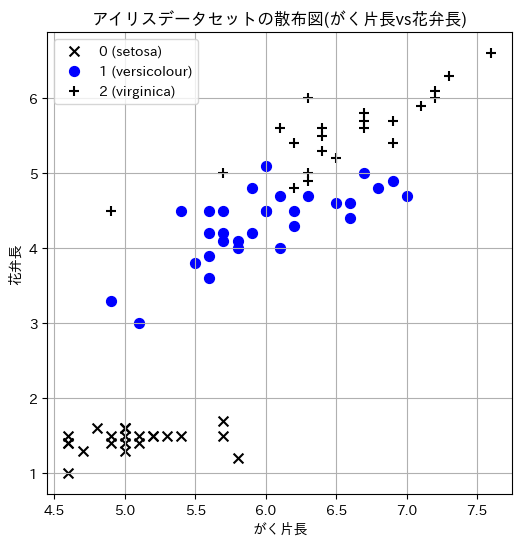

In [13]:
# 散布図表示用に入力データを分割

# 正解値によるデータ分割
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
x_t2 = x_train[y_train == 2]

# グラフのサイズ指定
plt.figure(figsize=(6,6))

# マーカを変えて散布図表示
plt.scatter(x_t0[:,1], x_t0[:,2], marker='x', c='k', s=50, label='0 (setosa)')
plt.scatter(x_t1[:,1], x_t1[:,2], marker='o', c='b', s=50, label='1 (versicolour)')
plt.scatter(x_t2[:,1], x_t2[:,2], marker='+', c='k', s=50, label='2 (virginica)')

# グラフのキレイ化
plt.title('アイリスデータセットの散布図(がく片長vs花弁長)')
plt.xlabel('がく片長')
plt.ylabel('花弁長')
plt.legend()
plt.grid()
create_pdf()
plt.show()

### 基本関数定義

#### softmax関数

In [14]:
# softmax関数
def softmax(x):
    """予測関数（確率を出力）"""
    x = x.T
    x_max = x.max(axis=0)
    x = x - x_max
    w = np.exp(x)
    return (w / w.sum(axis=0)).T

#### 予測関数

In [15]:
# 予測関数
def pred(x, W):
    """予測関数（確率を出力）"""
    return softmax(x @ W)

#### 交差エントロピー関数

In [16]:
# 交差エントロピー関数
def cross_entropy(yt, yp):
    """交差エントロピー損失"""

    # 個別データごとに交差エントロピーを計算
    ce = -np.sum(yt * np.log(yp), axis=1)

    # 全データの平均を取り戻り値とする
    return np.mean(ce)

#### クラス変換関数

In [17]:
# クラス変換関数
def classify(yp_ohe):
    """確率ベクトル→クラス（0 or 1 or 2）変換"""

    # 確率値ベクトルとargmax関数で0/1/2を判定
    return np.argmax(yp_ohe, axis=1)

#### 評価関数

In [18]:
# 評価関数
from sklearn.metrics import accuracy_score
def evaluate(x_test, y_test, y_test_ohe, W):
    """損失と精度を計算"""

    # 予測値の計算(確率値)
    yp_test_ohe = pred(x_test, W)

    # 予測クラス計算(0, 1, 2)
    yp_test = classify(yp_test_ohe)

    # 損失計算(確率値を利用)
    loss = cross_entropy(y_test_ohe, yp_test_ohe)

    # 精度計算(予測クラスを利用)
    score = accuracy_score(y_test, yp_test)

    # 損失と精度を戻す
    return loss, score

### 学習

#### 学習関数

In [41]:
# 学習関数

def train_multi_logistic_regression(x, yt_ohe, x_test, \
y_test, y_test_ohe,  alpha=0.01, iters=10000, his_unit=100):
    # M(データ件数)とD(入力データ要素数)の設定
    M, D = x.shape
    # 分類先クラス数
    N = yt_ohe.shape[1]
    # 重み行列初期化(全要素1を設定)
    W = np.ones((D, N))
    # 学習過程記録用
    history = np.zeros((0,3))

    # 繰り返し処理
    for k in range(iters):
        # 予測計算
        yp = pred(x, W)
        # 誤差計算
        yd = yp - yt
        # 勾配計算
        grad = (x.T @ yd) / M
        # パラメータ修正
        W -= alpha * grad

        if k % his_unit == 0:
            loss, score = evaluate(x_test, y_test, y_test_ohe, W)
            history = np.vstack((history, np.array([k, loss, score])))
            print(f"iter={k:5d} | loss={loss:.6f} | score={score:.6f}")
    return W, history


#### 学習

In [42]:
# 学習

# 変数設定
x, yt = x_train, y_train_ohe

# 学習率と繰り返し回数の設定
alpha = 0.01
iters = 10000
his_unit = 100

# 繰り返し処理
W, history = train_multi_logistic_regression(x, yt, \
    x_test, y_test, y_test_ohe, alpha=alpha, iters=iters, his_unit=his_unit)


iter=    0 | loss=1.092628 | score=0.266667
iter=  100 | loss=0.835942 | score=0.626667
iter=  200 | loss=0.700670 | score=0.786667
iter=  300 | loss=0.623633 | score=0.826667
iter=  400 | loss=0.573766 | score=0.866667
iter=  500 | loss=0.538193 | score=0.880000
iter=  600 | loss=0.510979 | score=0.880000
iter=  700 | loss=0.489081 | score=0.906667
iter=  800 | loss=0.470795 | score=0.920000
iter=  900 | loss=0.455095 | score=0.920000
iter= 1000 | loss=0.441329 | score=0.920000
iter= 1100 | loss=0.429061 | score=0.920000
iter= 1200 | loss=0.417988 | score=0.920000
iter= 1300 | loss=0.407893 | score=0.920000
iter= 1400 | loss=0.398615 | score=0.933333
iter= 1500 | loss=0.390030 | score=0.933333
iter= 1600 | loss=0.382044 | score=0.946667
iter= 1700 | loss=0.374582 | score=0.946667
iter= 1800 | loss=0.367581 | score=0.946667
iter= 1900 | loss=0.360993 | score=0.946667
iter= 2000 | loss=0.354775 | score=0.946667
iter= 2100 | loss=0.348892 | score=0.946667
iter= 2200 | loss=0.343314 | sco

### 結果分析

#### 初期状態と最終状態の比較

In [38]:
# 初期状態と最終状態の比較
print(f"初期状態: 損失={history[0,1]:.6f}, 精度={history[0,2]:.6f}")
print(f"最終状態: 損失={history[-1,1]:.6f}, 精度={history[-1,2]:.6f}")

初期状態: 損失=1.092628, 精度=0.266667
最終状態: 損失=0.198543, 精度=0.960000


#### 学習曲線(損失)

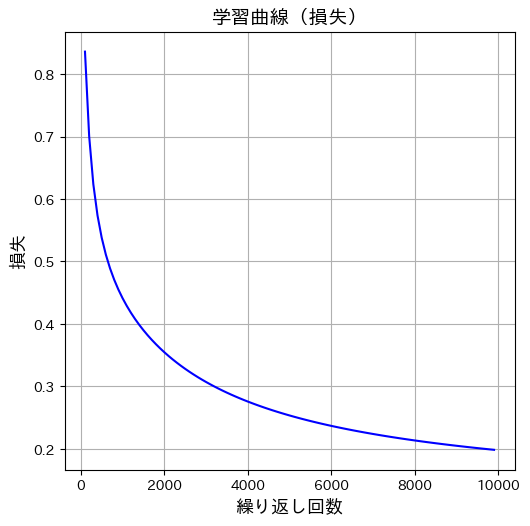

In [39]:
# 学習曲線(損失)
plt.figure(figsize=(6,6))
plt.plot(history[1:,0], history[1:,1], color='blue')
plt.title('学習曲線（損失）', fontsize=14)
plt.xlabel('繰り返し回数', fontsize=13)
plt.ylabel('損失', fontsize=13)
plt.grid(True)
plt.show()

#### 学習曲線(精度)

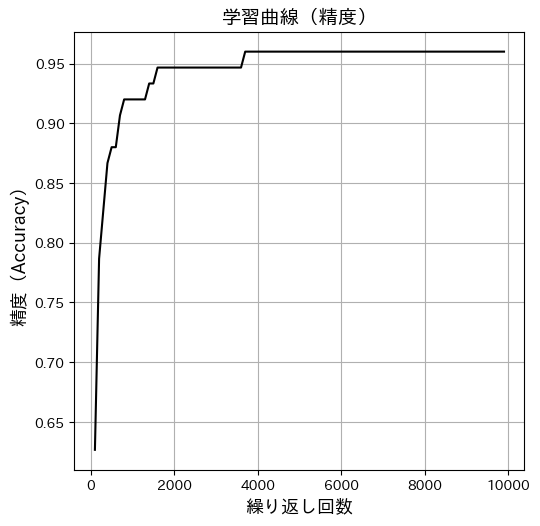

In [40]:
# 学習曲線(精度)
plt.figure(figsize=(6,6))
plt.plot(history[1:,0], history[1:,2], color='black')
plt.title('学習曲線（精度）', fontsize=14)
plt.xlabel('繰り返し回数', fontsize=13)
plt.ylabel('精度（Accuracy）', fontsize=13)
plt.grid(True)
plt.show()

#### 予測関数の3次元曲面表示

pdf-01-03.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

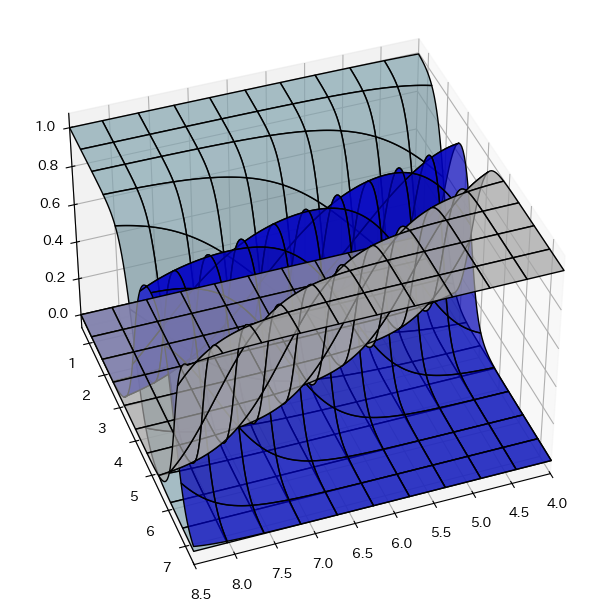

In [24]:
# 予測関数の3次元曲面表示
from mpl_toolkits.mplot3d import Axes3D
x1 = np.linspace(4, 8.5, 100)
x2 = np.linspace(0.5, 7.5, 100)
xx1, xx2 = np.meshgrid(x1, x2)
xxx = np.array([np.ones(xx1.ravel().shape),
    xx1.ravel(), xx2.ravel()]).T
pp = pred(xxx, W)
c0 = pp[:,0].reshape(xx1.shape)
c1 = pp[:,1].reshape(xx1.shape)
c2 = pp[:,2].reshape(xx1.shape)
plt.figure(figsize=(8,8))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.plot_surface(xx1, xx2, c0, color='lightblue',
    edgecolor='black', rstride=10, cstride=10, alpha=0.7)
ax.plot_surface(xx1, xx2, c1, color='blue',
    edgecolor='black', rstride=10, cstride=10, alpha=0.7)
ax.plot_surface(xx1, xx2, c2, color='lightgrey',
    edgecolor='black', rstride=10, cstride=10, alpha=0.7)
ax.scatter(x_t0[:,0], x_t0[:,1], 1, s=50, alpha=1, marker='+', c='k')
ax.scatter(x_t1[:,0], x_t1[:,1], 1, s=30, alpha=1, marker='o', c='k')
ax.scatter(x_t2[:,0], x_t2[:,1], 1, s=50, alpha=1, marker='x', c='k')
ax.set_xlim(4,8.5)
ax.set_ylim(0.5,7.5)
ax.view_init(elev=40, azim=70)
create_pdf()

#### 詳細な精度評価

In [25]:
# 詳細な精度評価
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# テストデータで予測値の計算
yp_test_one = pred(x_test, W)
yp_test = np.argmax(yp_test_one, axis=1)

#  精度の計算
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, yp_test)
print('accuracy: %f' % score)

# 混同行列の表示
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, yp_test))
print(classification_report(y_test, yp_test))

accuracy: 0.960000
[[27  0  0]
 [ 0 20  0]
 [ 0  3 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.87      1.00      0.93        20
           2       1.00      0.89      0.94        28

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.97      0.96      0.96        75



### 入力変数をオリジナルの4つに変更

#### データ加工

In [26]:
# データ加工

# x_data3: 4要素を持つNumPy配列
x_data3 = df[['がく片長', 'がく片幅', '花弁長', '花弁幅']].values

# x_daa4: x_data3にダミー変数を追加
x_data4 = np.insert(x_data3, 0, 1.0, axis=1)

# 訓練データとテストデータへの分割
x_train2, x_test2, y_train, y_test,\
y_train_ohe, y_test_ohe = train_test_split(
    x_data4, y_data, y_data_ohe,
    train_size=75, test_size=75, random_state=123)

# 各変数のshape確認
print('x_train2', x_train2.shape)
print('x_test2', x_test2.shape)

# xtrainの内容確認
print(x_train2[:5])

x_train2 (75, 5)
x_test2 (75, 5)
[[1.000 6.300 3.300 4.700 1.600]
 [1.000 7.000 3.200 4.700 1.400]
 [1.000 5.000 3.000 1.600 0.200]
 [1.000 6.400 2.800 5.600 2.100]
 [1.000 6.300 2.500 5.000 1.900]]


#### 学習

In [27]:
# 学習

# 変数設定
x, yt = x_train2, y_train_ohe

# 学習率と繰り返し回数の設定
alpha = 0.01
iters = 10000
his_unit = 100

# 繰り返し処理
W, history = train_multi_logistic_regression(x, yt, \
    x_test2, y_test, y_test_ohe, alpha=alpha, iters=iters, his_unit=his_unit)


iter=    0 | loss=1.091583 | score=0.266667
iter=  100 | loss=0.724936 | score=0.693333
iter=  200 | loss=0.592731 | score=0.840000
iter=  300 | loss=0.526054 | score=0.906667
iter=  400 | loss=0.483402 | score=0.906667
iter=  500 | loss=0.452214 | score=0.906667
iter=  600 | loss=0.427532 | score=0.920000
iter=  700 | loss=0.407011 | score=0.920000
iter=  800 | loss=0.389395 | score=0.933333
iter=  900 | loss=0.373938 | score=0.946667
iter= 1000 | loss=0.360167 | score=0.960000
iter= 1100 | loss=0.347760 | score=0.960000
iter= 1200 | loss=0.336488 | score=0.960000
iter= 1300 | loss=0.326179 | score=0.960000
iter= 1400 | loss=0.316700 | score=0.960000
iter= 1500 | loss=0.307948 | score=0.960000
iter= 1600 | loss=0.299835 | score=0.960000
iter= 1700 | loss=0.292292 | score=0.960000
iter= 1800 | loss=0.285258 | score=0.960000
iter= 1900 | loss=0.278683 | score=0.960000
iter= 2000 | loss=0.272521 | score=0.960000
iter= 2100 | loss=0.266736 | score=0.960000
iter= 2200 | loss=0.261293 | sco

#### 結果分析

初期状態: 損失=1.091583, 精度=0.266667
最終状態: 損失=0.137669, 精度=0.960000


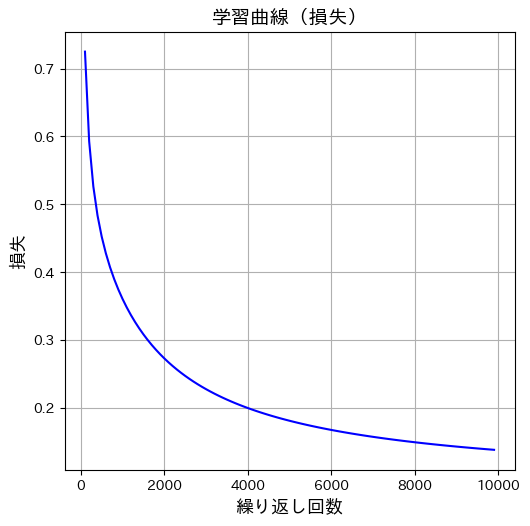

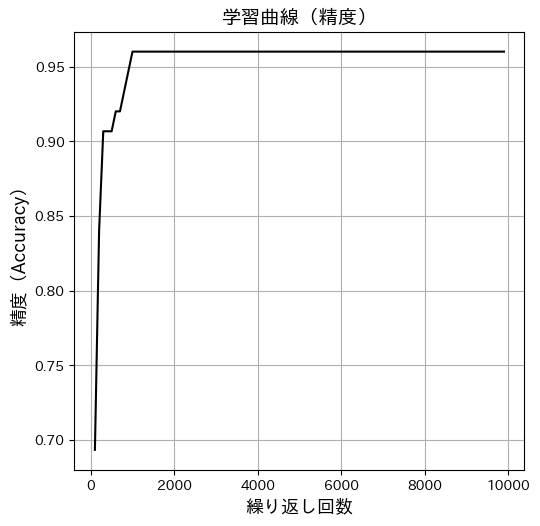

In [28]:
# 結果分析

# 初期状態と最終状態の比較
print(f"初期状態: 損失={history[0,1]:.6f}, 精度={history[0,2]:.6f}")
print(f"最終状態: 損失={history[-1,1]:.6f}, 精度={history[-1,2]:.6f}")

# 学習曲線(損失)
plt.figure(figsize=(6,6))
plt.plot(history[1:,0], history[1:,1], color='blue')
plt.title('学習曲線（損失）', fontsize=14)
plt.xlabel('繰り返し回数', fontsize=13)
plt.ylabel('損失', fontsize=13)
plt.grid(True)
plt.show()

# 学習曲線(精度)
plt.figure(figsize=(6,6))
plt.plot(history[1:,0], history[1:,2], color='black')
plt.title('学習曲線（精度）', fontsize=14)
plt.xlabel('繰り返し回数', fontsize=13)
plt.ylabel('精度（Accuracy）', fontsize=13)
plt.grid(True)
plt.show()


### バージョン確認

In [29]:
!pip install watermark -qq
%load_ext watermark
%watermark --iversions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.6 MB/s eta 0:00:00
matplotlib         : 3.10.0
google             : 2.0.3
sklearn            : 1.6.1
pandas             : 2.2.2
japanize_matplotlib: 1.1.3
numpy              : 2.0.2
IPython            : 7.34.0
matplotlib_inline  : 0.1.7

